# Analisi con la DMA


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# \dma\CFRP_0.5N encoding = 'cp1252' engine='python' skipfooter =1 decimal= ","

def estrai(path_base,N):
    data = pd.DataFrame(columns = ['test','f','M*','tan_delta'])
    names = ['Index','Ts','t','f','F','x','Phase','F0','x0','Tr','M','M\'','M*','tan_delta','C','C\'','C*']
    for i in range(1,N):
        df = pd.read_csv(path_base+f'_{i}.txt',delimiter='  ',names = names,skiprows=2,encoding = 'cp1252',engine='python',skipfooter =1)
        df['test'] = f'test_1N_{i}'
        df['f'] = df['f'].str.replace(',','.')
        df['f'] = pd.to_numeric(df['f'])
        df['M*'] = df['M*'].str.replace(',','.')
        df['M*'] = pd.to_numeric(df['M*'])
        df['tan_delta'] = df['tan_delta'].str.replace(',','.')
        df['tan_delta'] = pd.to_numeric(df['tan_delta'])
        data = pd.merge(data,df[['test','f','M*','tan_delta']],how='outer')
    data = data.set_index(['test'])
    print(data)
    return data
    #print(data.loc['test_1N_1']['tan_delta'])

path_base = r'dma/CFRP_1N/CFRP_1N'
data_1N = estrai(path_base,6)


                f       M*  tan_delta
test                                 
test_1N_1    0.01  22916.3   0.074235
test_1N_1    5.01  22425.5   0.148819
test_1N_1   10.01  22115.6   0.147692
test_1N_1   15.01  21805.9   0.105217
test_1N_1   20.01  21545.4   0.054737
...           ...      ...        ...
test_1N_5   80.01  19742.0   0.063255
test_1N_5   85.01  19533.1   0.065409
test_1N_5   90.01  19332.1   0.070395
test_1N_5   95.01  19125.8   0.075481
test_1N_5  100.01  18930.0   0.077437

[105 rows x 3 columns]


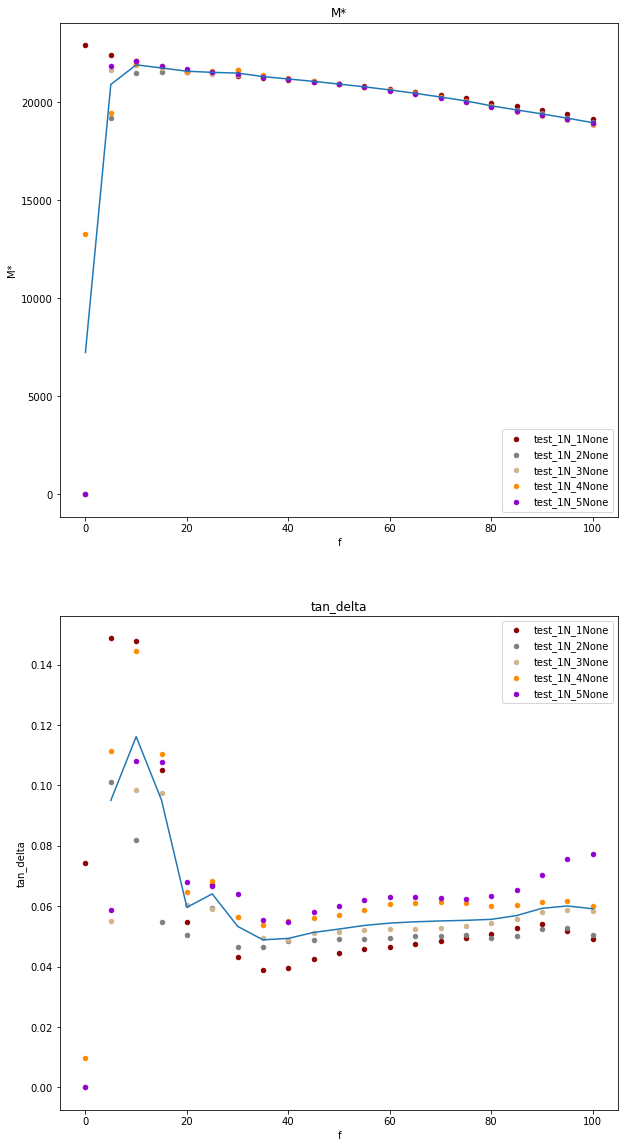

In [159]:
def plottaggio(data,N,ax1,ax2,label=''):
    colori = ['darkred','grey','tan','darkorange','darkviolet','crimson']
    M_media = np.zeros(data.loc[f'test_1N_1']['M*'].size)
    tan_media = np.zeros(data.loc[f'test_1N_1']['M*'].size)
    f = data.loc[f'test_1N_{1}']['f'].to_numpy()
    for i in range(1,N):
        data.loc[f'test_1N_{i}'].plot.scatter(x='f',y='M*',ax = ax1,label=f'test_1N_{i}{label}',color=colori[i-1])
        data.loc[f'test_1N_{i}'].plot.scatter(x='f',y='tan_delta',ax = ax2,label=f'test_1N_{i}{label}',color=colori[i-1])
        M_media += data.loc[f'test_1N_{i}']['M*'].to_numpy()/(N-1)
        tan_media += data.loc[f'test_1N_{i}']['tan_delta'].to_numpy()/(N-1)
    ax1.plot(f,M_media,label='media')
    #coef = np.polyfit(f,M_media,30)
    #f_fittato = np.arange(f[0],f[-1],0.5) 
    #M_media_fittato = np.zeros(f_fittato.shape)
    #for i in range(len(coef)):
    #    M_media_fittato += coef[i]*f_fittato**i
    #ax1.plot(f_fittato,M_media_fittato,label='media')    
    ax2.plot(f,tan_media,label='media')
    ax1.set(title='M*')
    ax2.set(title='tan_delta')
    return (ax1,ax2)

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,20))
plottaggio(data_1N,6,ax1,ax2)
plt.show()


## dati con 0.5N di forza

                f       M*  tan_delta
test                                 
test_1N_1    0.01  25220.5   0.142616
test_1N_1    5.01  23802.8   0.146558
test_1N_1   10.01  23256.2   0.131525
test_1N_1   15.01  22036.8   0.098980
test_1N_1   20.01  21544.6   0.083110
...           ...      ...        ...
test_1N_5   80.01  21912.8   0.364875
test_1N_5   85.01  21896.6   0.400657
test_1N_5   90.01  21924.4   0.429023
test_1N_5   95.01  22005.0   0.459318
test_1N_5  100.01  22111.8   0.477509

[105 rows x 3 columns]


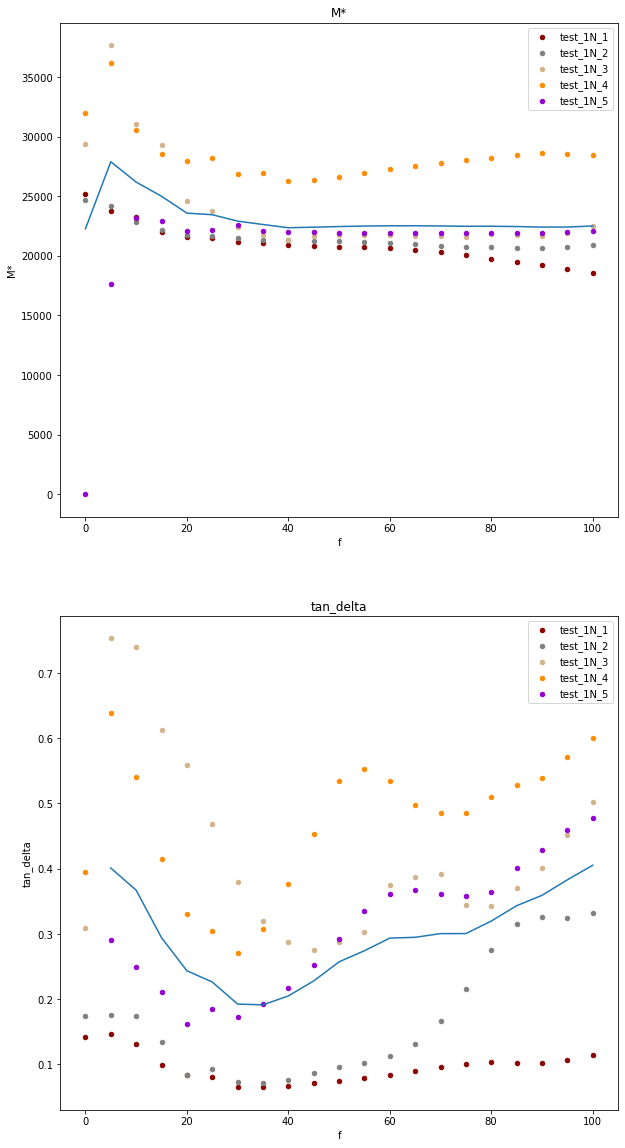

In [157]:
# set a 0.5N
path_base = r'dma/CFRP_05N/CFRP_0.5N'
data_5N = estrai(path_base,6)
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,20))
plottaggio(data_5N,6,ax1,ax2)
plt.show()

## 1N fitto fino ai 50Hz

              f       M*  tan_delta
test                               
test_1N_1   0.1  22806.1   0.182361
test_1N_1   2.1  22490.5   0.180572
test_1N_1   4.1  22175.6   0.177535
test_1N_1   6.1  22073.6   0.178520
test_1N_1   8.1  21974.2   0.176827
...         ...      ...        ...
test_1N_3  42.1  22340.3   0.258650
test_1N_3  44.1  22427.0   0.253313
test_1N_3  46.1  22538.4   0.257638
test_1N_3  48.1  22642.2   0.269797
test_1N_3  50.1  22709.8   0.284094

[78 rows x 3 columns]


<function matplotlib.pyplot.show(*args, **kw)>

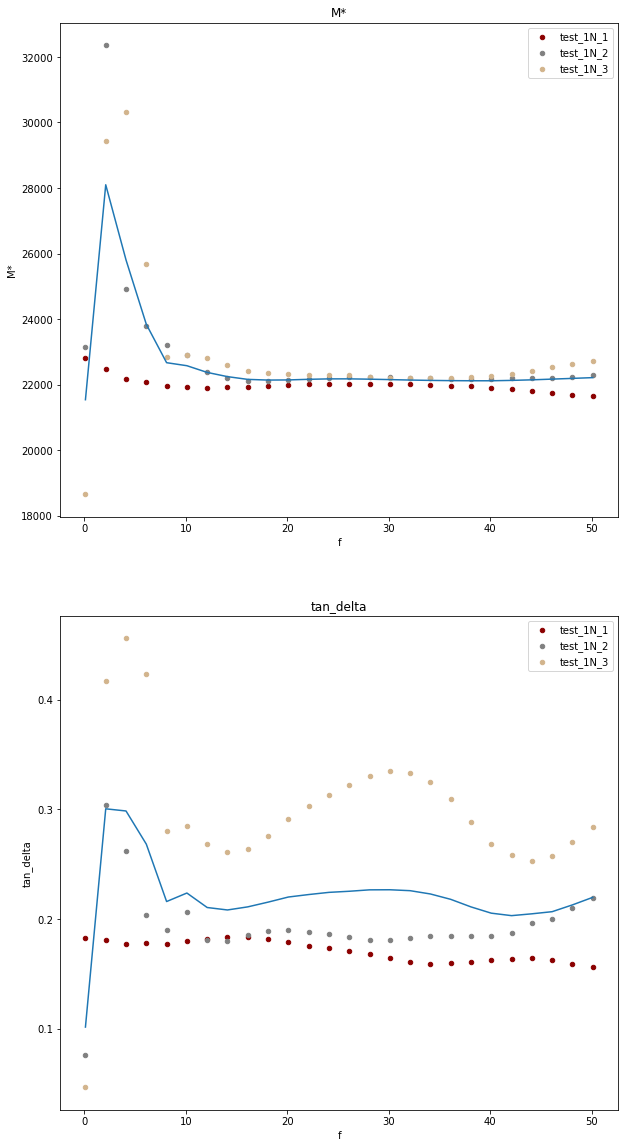

In [158]:
# set a 1N fitto (fmax 50Hz)
path_base = r'dma/CFRP_1N _50HZ/CFRP_1N'
data_1N_50 = estrai(path_base,4)
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,20))
plottaggio(data_1N_50,4,ax1,ax2)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

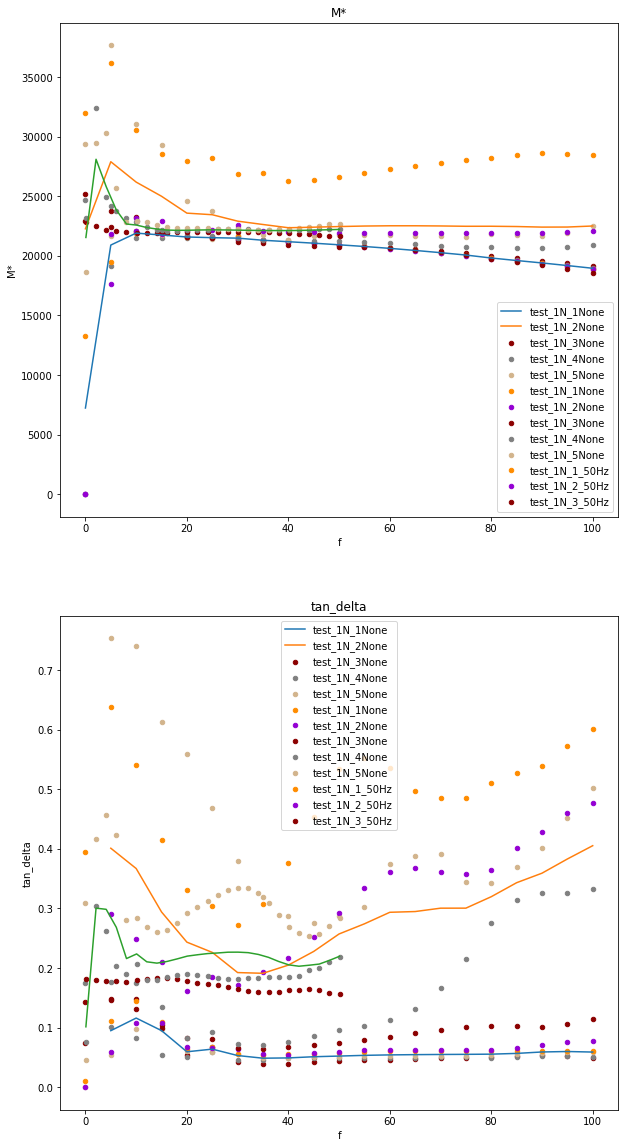

In [160]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,20))

plottaggio(data_1N,6,ax1,ax2)
plottaggio(data_5N,6,ax1,ax2)
plottaggio(data_1N_50,4,ax1,ax2,label='_50Hz')
plt.show()
